<a href="https://colab.research.google.com/github/samartha007/Psoriasis-detection-using-transfer-learning/blob/New-random-sampling-method/Mobile_net_parameter_tuweking_with_ROC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten,Dropout
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,roc_curve,auc


from keras.applications.mobilenet import MobileNet
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
#### Modeling
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from tensorflow.keras.optimizers import Adam,SGD,Adagrad
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications import EfficientNetB0
from keras.applications.mobilenet import MobileNet
from keras.applications.vgg19 import VGG19
from tensorflow.keras.applications import ResNet50
from sklearn.model_selection import cross_val_score,cross_val_predict, StratifiedKFold
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc



In [2]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.vgg16 import preprocess_input

# Path to the directories containing the class data
class_1_directory = '/content/gdrive/MyDrive/all patch data/all patch data/updated_new_data_disease'
class_2_directory = '/content/gdrive/MyDrive/all patch data/all patch data/New_updated normal/Selected_Normal_Patch_Data'


# Get a list of image filenames for each class
class_1_filenames = os.listdir(class_1_directory)
class_2_filenames = os.listdir(class_2_directory)

# Create empty lists to store the data and labels
data = []
labels = []

# Loop over each image in class 1
for image_filename in class_1_filenames:
    # Read the image
    image_path = os.path.join(class_1_directory, image_filename)
    image = Image.open(image_path)

    # Preprocess the image for VGG16
    image = image.resize((224, 224))
    # image = image.convert('RGB')
    image = np.array(image)
    # image = preprocess_input(image)

    # Add the preprocessed image and corresponding label to the lists
    data.append(image)
    labels.append(0)  # Class 1 is labeled as 0

# Loop over each image in class 2
for image_filename in class_2_filenames:
    # Read the image
    image_path = os.path.join(class_2_directory, image_filename)
    image = Image.open(image_path)

    # Preprocess the image for VGG16
    image = image.resize((224, 224))
    # image = image.convert('RGB')
    image = np.array(image)
    # image = preprocess_input(image)

    # Add the preprocessed image and corresponding label to the lists
    data.append(image)
    labels.append(1)  # Class 2 is labeled as 1

# Convert the lists to NumPy arrays
data = np.array(data)
labels = np.array(labels)
# # Normalize the image data
data = data / 255.0
# Split the data into training and testing sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(data, labels, test_size=0.2, random_state=42)


## Structural difference between our prosposed modela and default pre tranied model applicationon our data.

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D,Flatten
from tensorflow.keras.models import Model

# Load the MobileNetV2 model without the top classification layer
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add your custom output layer for binary classification
num_classes = 1  # For binary classification (1 class or not)
x = base_model.output
x=Flatten()(x)
output_layer = Dense(num_classes, activation='sigmoid')(x)

# Create the custom model with the MobileNetV2 base and custom output
custom_model = Model(inputs=base_model.input, outputs=output_layer)

# Freeze the layers of the MobileNetV2 base model to prevent them from being updated during training
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
custom_model.compile(optimizer='adagrad', loss='binary_crossentropy', metrics=['accuracy'])

# Display the summary of the custom model
custom_model.summary()


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D,Flatten
from tensorflow.keras.models import Model

# Load the MobileNetV2 model without the top classification layer
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add your custom output layer for binary classification
num_classes = 1  # For binary classification (1 class or not)
x = base_model.output
x=Flatten()(x)
x=Dense(224, activation='relu')(x)
x=Dropout(0.5)(x)
x=Dense(1, activation='sigmoid')(x)
output_layer = Dense(num_classes, activation='sigmoid')(x)

# Create the custom model with the MobileNetV2 base and custom output
model = Model(inputs=base_model.input, outputs=output_layer)

# Freeze the layers of the MobileNetV2 base model to prevent them from being updated during training
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adagrad', loss='binary_crossentropy', metrics=['accuracy'])

# Display the summary of the custom model
model.summary()

In [ ]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten,Dropout
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

## Mobilenet
# Set the random seed
random_seed = 42
np.random.seed(random_seed)
tf.random.set_seed(random_seed)

from keras.applications.mobilenet import MobileNet

# Step 2: Load a pre-trained model (VGG16 in this example)
base_model =MobileNet(
    input_shape=(224,224,3),
    alpha=1.0,
    depth_multiplier=1,
    dropout=0.001,
    include_top=False
)

# Step 3: Build your model
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(224, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
base_model.trainable=False
# Step 4: Compile your model
model.compile(optimizer=SGD(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Step 5: Train your model
model.fit(X_train1, y_train1, epochs=1, validation_data=(X_test1, y_test1))
model.save('/content/mode.h5')
# Step 6: Evaluate your model
y_pred = model.predict(X_test1)
y_pred_binary = (y_pred >= 0.5).astype(int)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test1, y_pred_binary)
precision = precision_score(y_test1, y_pred_binary)
recall = recall_score(y_test1, y_pred_binary)
f1 = f1_score(y_test1, y_pred_binary)
confusion_mat = confusion_matrix(y_test1, y_pred_binary)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", confusion_mat)


In [ ]:
## For calculation of ROC with out using the roc_auc function
def calculate_roc_curve(y_true, y_score):
    # Step 1: Input Preparation
    y_true = np.array(y_true)
    y_score = np.array(y_score)

    # Step 2: Sorting
    sorted_indices = np.argsort(y_score, kind='mergesort')[::-1]
    sorted_y_true = y_true[sorted_indices]
    sorted_y_score = y_score[sorted_indices]

    # Step 3, 4, and 5: Threshold Calculation, TPR Calculation, and FPR Calculation
    num_positives = np.sum(sorted_y_true)
    num_negatives = len(sorted_y_true) - num_positives
    tpr_list = []
    fpr_list = []
    thresholds = []

    tp = 0
    fp = 0

    for i in range(len(sorted_y_true)):
        if sorted_y_true[i] == 1:
            tp += 1
        else:
            fp += 1

        tpr = tp / num_positives
        fpr = fp / num_negatives

        tpr_list.append(tpr)
        fpr_list.append(fpr)
        thresholds.append(sorted_y_score[i])

    return fpr_list, tpr_list, thresholds

In [ ]:
## Computing the ROC Curve
fpr,tpr,threshold=roc_curve(y_test1,y_pred)
## Compute AUC
roc_auc=auc(fpr,tpr)
## Plot the ROC
plt.figure()
plt.plot(fpr,tpr,label='ROC curve (area=%0.2f)'% roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('Flase Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Reciver Operating Characteristic")
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Example usage:
y_true = [0, 1, 0, 1, 1, 0, 0, 1]
y_score = [0.2, 0.6, 0.3, 0.8, 0.9, 0.4, 0.1, 0.7]

fpr_list, tpr_list, thresholds = calculate_roc_curve(y_test1, y_pred)
print("FPR:", fpr_list)
print("TPR:", tpr_list)
print("Thresholds:", thresholds)

In [ ]:
## calculating Specificity and Sensitivity
# Creating a function to report confusion metrics
def f1_scores (conf_matrix):
# save confusion matrix and slice into four pieces
    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]

    # calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))

    # calculate mis-classification
    conf_misclassification = 1- conf_accuracy

    # calculate the sensitivity
    conf_sensitivity = (TP / float(TP + FN))
    # calculate the specificity
    conf_specificity = (TN / float(TN + FP))

    # calculate precision
    conf_precision = (TN / float(TN + FP))
    # calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
    return conf_f1,conf_sensitivity,conf_specificity


In [ ]:

#### Model Performance
from sklearn import metrics
def performance(y_true,y_pred_probs):
    cm = metrics.confusion_matrix(y_true, y_pred_probs)
    print('     sensitivity :',(f1_scores(cm)[1]))
    print('     specificity :',(f1_scores(cm)[2]))
# y_true, y_pred_probs
print('Mobilenet ')
performance(y_test1,y_pred_binary)

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test1, y_pred_binary)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

## For Mobile Net application using the Newly mentioned method

In [ ]:
#### SIR Newly Mentioned Logic of sampling
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
sns=[]
spc=[]
AUC=[]
AUC_by_FPRandTPR=[]
validation_loss=[]
validation_accuracy=[]
# fpr=[]
# tpr=[]

# Assuming you have your feature data in 'X' and labels in 'y'
# Define your model as 'model'
# Define the number of epochs as 'num_epochs'
def sir_method(base,height,width,model_name):
# Get the total number of samples
  num_samples = len(labels)
  num_epochs=10
  for epoch in range(num_epochs):
      # Shuffle the data and labels
      shuffled_indices = np.random.permutation(num_samples)
      X_shuffled = data[shuffled_indices]
      y_shuffled =labels[shuffled_indices]

      # Split the data into training and validation sets
      train_size = int(0.8 * num_samples)
      X_train, X_val = X_shuffled[:train_size], X_shuffled[train_size:]
      y_train, y_val = y_shuffled[:train_size], y_shuffled[train_size:]
      base_model = base(weights='imagenet', include_top=False, input_shape=(height, width, 3))

        # Set up the model architecture
      model = Sequential()
      model.add(base_model)
      model.add(Flatten())
      model.add(Dense(height, activation='relu'))
      model.add(Dropout(0.5))
      model.add(Dense(1, activation='sigmoid'))
      base_model.trainable = False

      # Compile the model
      model.compile(optimizer='adagrad', loss='binary_crossentropy', metrics=['accuracy'])
      # Train the model on the training set
      model.fit(X_train, y_train, epochs=1, verbose=0)
      # Save the model after each epoch
      # model.save(f'/content/model_epoch_{model_name}_{epoch + 1}.h5')
      # Evaluate the model on the validation set
      val_loss, val_acc = model.evaluate(X_val, y_val, verbose=0)
      validation_loss.append(val_loss)
      validation_accuracy.append(val_acc)
      # Make predictions on the validation set
      y_pred = model.predict(X_val)
      # y_pred_prob = model.predict_proba(X_val)[:, 1]

      # Calculate sensitivity, specificity, and AUC
      cm = confusion_matrix(y_val, np.round(y_pred))
      tn, fp, fn, tp = cm.ravel()
      sensitivity = tp / (tp + fn)
      specificity = tn / (tn + fp)
      auc1 = roc_auc_score(y_val, y_pred)
      # roc_auc = roc_auc_score(y_val, y_pred_prob)
      sns.append(sensitivity)
      spc.append(specificity)
      AUC.append(auc1)
      print(auc1)
      y_pred_binary = (y_pred >= 0.5).astype(int)
      # Calculate the ROC curve
      fpr1, tpr1, thresholds = roc_curve(y_val, y_pred)
      ## Computing the ROC Curve
      # fpr,tpr,threshold=roc_curve(y_test1,y_pred)
      ## Compute AUC
      roc_auc=auc(fpr1,tpr1)
      ## Plot the ROC
      plt.figure()
      plt.plot(fpr1,tpr1,label='ROC curve (area=%0.2f)'% roc_auc)
      plt.plot([0,1],[0,1],'k--')
      plt.xlim([0.0,1.0])
      plt.ylim([0.0,1.05])
      plt.xlabel('Flase Positive Rate')
      plt.ylabel('True Positive Rate')
      plt.title("Reciver Operating Characteristic")
      plt.legend(loc='lower right')
      plt.show()
  return sns,spc,AUC,validation_loss,validation_accuracy


6/6 [==============================] - 1s 32ms/step
0.9962527458327949


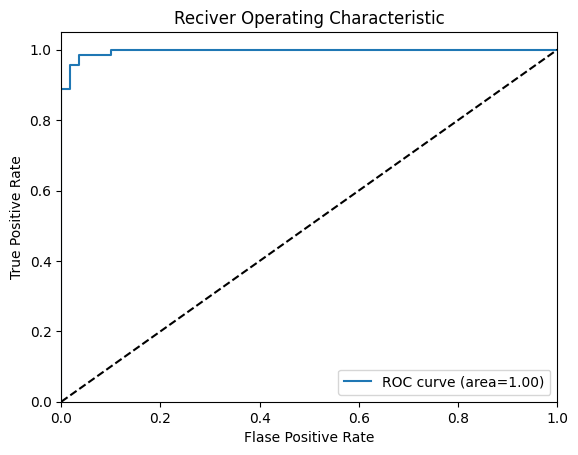

6/6 [==============================] - 1s 36ms/step
0.9935695372588577


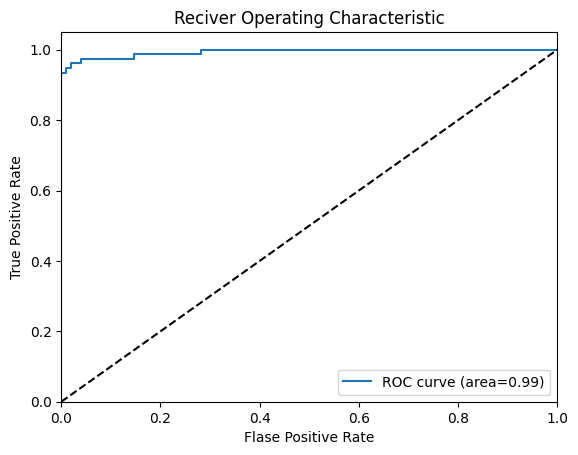

6/6 [==============================] - 1s 32ms/step
0.9966403928156092


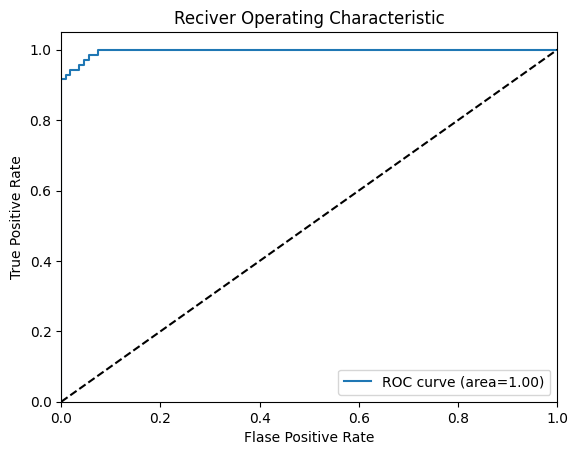

6/6 [==============================] - 1s 32ms/step
0.9984332158245202


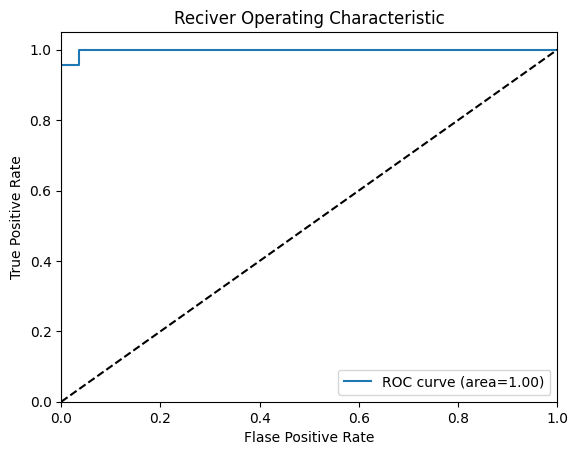

6/6 [==============================] - 1s 32ms/step
0.9934707463833056


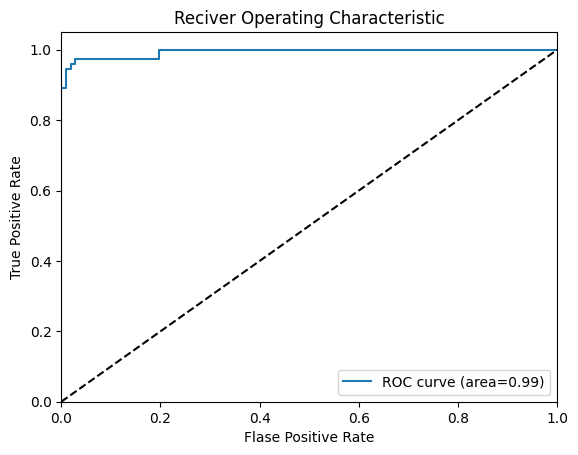

6/6 [==============================] - 1s 33ms/step
0.9896091044037605


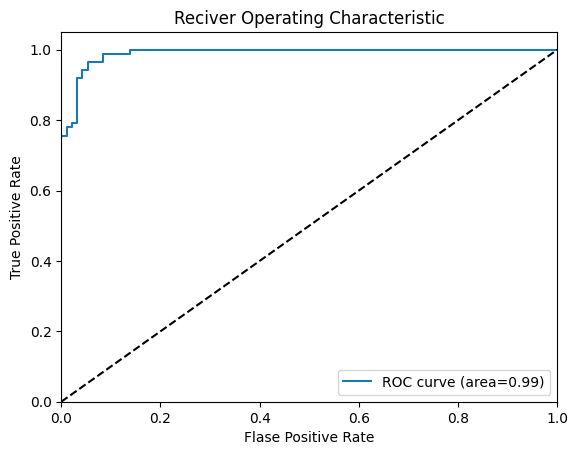

6/6 [==============================] - 1s 36ms/step
0.987895599546085


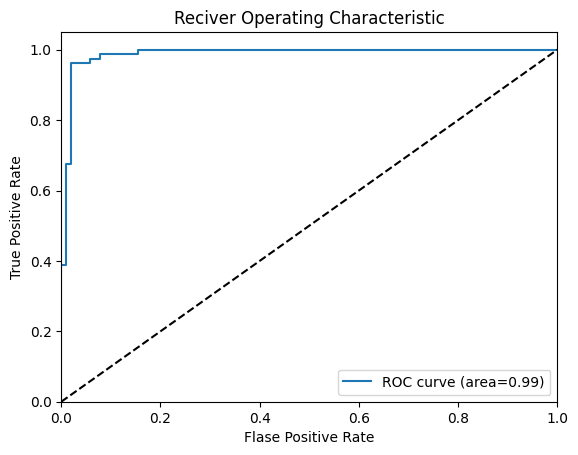

6/6 [==============================] - 1s 31ms/step
0.99987640588308


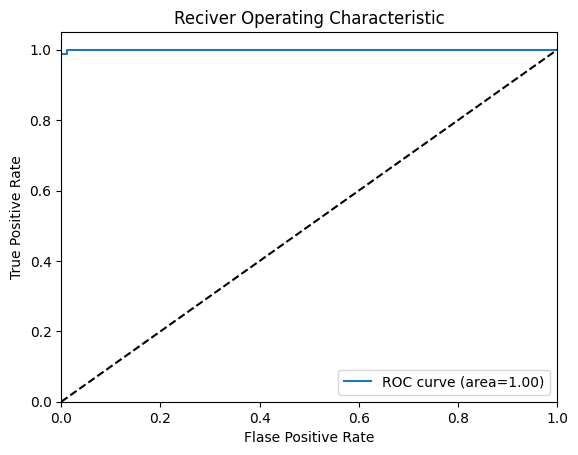

6/6 [==============================] - 1s 33ms/step
0.9964197530864197


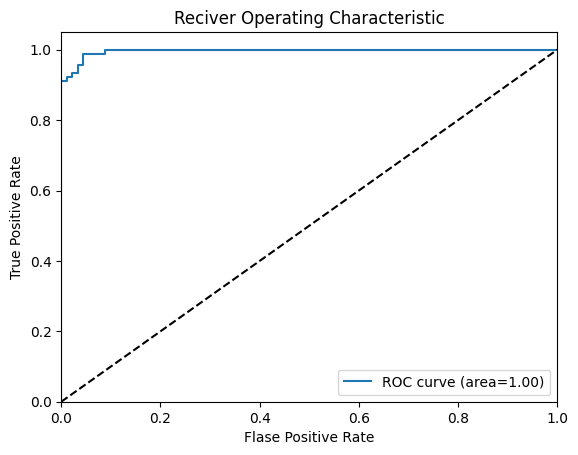

6/6 [==============================] - 1s 32ms/step
0.9950476190476191


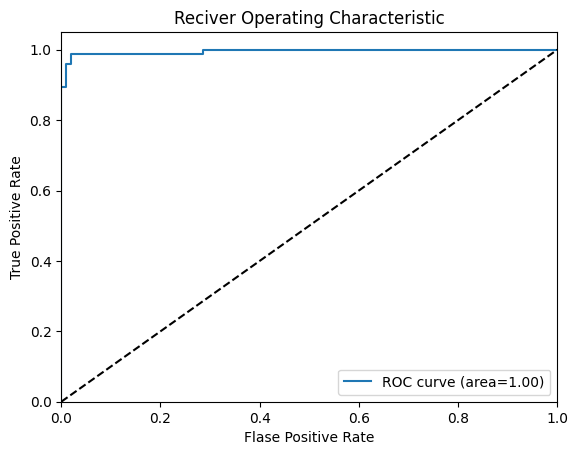

In [ ]:
mobile_net_sns,mobile_net_spc,mobile_net_auc,mobile_net_val_loss,mobile_net_val_acc=sir_method(MobileNet,224,224,'MobileNet')

In [ ]:
print(f'Mean sensitivity of MobileNet after 10 epochs {np.mean(mobile_net_sns)}')
print(f'Mean specificity after 10 epochs {np.mean(mobile_net_spc)}')
print(f'Mean AUC after 10 epochs {np.mean(mobile_net_auc)}')

Mean sensitivity of MobileNet after 10 epochs 0.9551244934056585
Mean specificity after 10 epochs 0.9642339904100666
Mean AUC after 10 epochs 0.9947215120082052


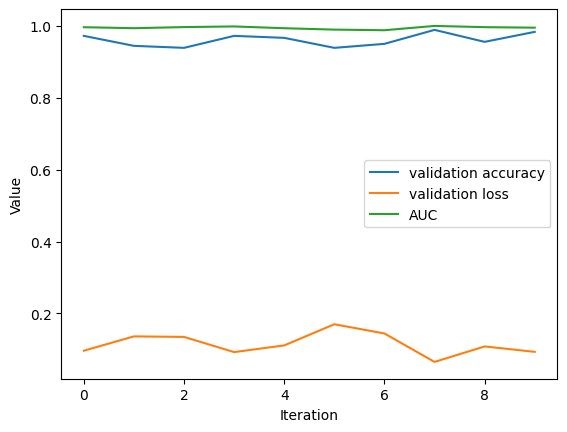

In [ ]:

# Generate x-axis values (indices of the data list)
x = range(len(mobile_net_val_acc))

# Plot the data
plt.plot(x, mobile_net_val_acc,label='validation accuracy')
plt.plot(x, mobile_net_val_loss,label='validation loss')
plt.plot(x, mobile_net_auc,label='AUC')
# Add labels and title to the plot
plt.xlabel('Iteration')
plt.ylabel('Value')
# plt.title('Plot of List of Values')
# Adding legend
plt.legend()
# Display the plot
plt.show()

### For Resnet-50 application

In [ ]:
res_net_sns,res_net_spc,res_net_auc,res_net_val_loss,res_net_val_acc=sir_method(ResNet50,224,224,'ResNet50')

In [ ]:
print(f'Mean sensitivity of VGG16 after 10 epochs {np.mean(res_net_sns)}')
print(f'Mean specificity of VGG16 after 10 epochs {np.mean(res_net_spc)}')
print(f'Mean AUC of VGG16 after 10 epochs {np.mean(res_net_auc)}')

In [ ]:
range(len(res_net_val_acc))

In [ ]:
# Generate x-axis values (indices of the data list)
x = range(len(res_net_val_acc))

# Plot the data
plt.plot(x, res_net_val_acc,label='validation accuracy')
plt.plot(x, res_net_val_loss,label='validation loss')
plt.plot(x, res_net_auc,label='AUC')
# Add labels and title to the plot
plt.xlabel('Iteration')
plt.ylabel('Value')
# plt.title('Plot of List of Values')
# Adding legend
plt.legend()
# Display the plot
plt.show()

In [ ]:
x

## For VGG 16 and 19 application

In [ ]:
vgg16_sns,vgg16_spc,vgg16_auc,vgg16_val_loss,vgg16_val_acc=sir_method(VGG16,224,224,'VGG16')

In [ ]:
print(f'Mean sensitivity of VGG16 after 10 epochs {np.mean(vgg16_sns)}')
print(f'Mean specificity of VGG16 after 10 epochs {np.mean(vgg16_spc)}')
print(f'Mean AUC of VGG16 after 10 epochs {np.mean(vgg16_auc)}')

In [ ]:
# Generate x-axis values (indices of the data list)
x = range(len(vgg16_val_acc))

# Plot the data
plt.plot(x, vgg16_val_acc,label='validation accuracy')
plt.plot(x, vgg16_val_loss,label='validation loss')
plt.plot(x, vgg16_auc,label='AUC')
# Add labels and title to the plot
plt.xlabel('Iteration')
plt.ylabel('Value')
# plt.title('Plot of List of Values')
# Adding legend
plt.legend(loc='upper right')
# Display the plot
plt.show()

In [ ]:
vgg19_sns,vgg19_spc,vgg19_auc,vgg19_val_loss,vgg19_val_acc=sir_method(VGG19,224,224,'VGG19')

In [ ]:
print(f'Mean sensitivity of VGG19 after 10 epochs {np.mean(vgg19_sns)}')
print(f'Mean specificity of VGG19 after 10 epochs {np.mean(vgg19_spc)}')
print(f'Mean AUC of VGG19 after 10 epochs {np.mean(vgg19_auc)}')

In [ ]:
range(len(vgg19_auc))

In [ ]:
# Generate x-axis values (indices of the data list)
x = range(len(vgg19_val_acc))

# Plot the data
plt.plot(x, vgg19_val_acc,label='validation accuracy')
plt.plot(x, vgg19_val_loss,label='validation loss')
plt.plot(x, vgg19_auc,label='AUC')
# Add labels and title to the plot
plt.xlabel('Iteration')
plt.ylabel('Value')
# plt.title('Plot of List of Values')
# Adding legend
plt.legend()
# Display the plot
plt.show()

## Fine Tuning of Mobile Net

In [ ]:
#### SIR Newly Mentioned Logic of sampling
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix
sns=[]
spc=[]
AUC=[]
validation_loss=[]
validation_accuracy=[]
# Assuming you have your feature data in 'X' and labels in 'y'
# Define your model as 'model'
# Define the number of epochs as 'num_epochs'
def sir_method_fine_tuned_model(base,height,width,model_name):
# Get the total number of samples
  num_samples = len(labels)
  num_epochs=10
  for epoch in range(num_epochs):
      # Shuffle the data and labels
      shuffled_indices = np.random.permutation(num_samples)
      X_shuffled = data[shuffled_indices]
      y_shuffled =labels[shuffled_indices]

      # Split the data into training and validation sets
      train_size = int(0.8 * num_samples)
      X_train, X_val = X_shuffled[:train_size], X_shuffled[train_size:]
      y_train, y_val = y_shuffled[:train_size], y_shuffled[train_size:]
      base_model = base(weights='imagenet', include_top=False, input_shape=(height, width, 3))

        # Set up the model architecture
      model = Sequential()
      model.add(base_model)
      model.add(Flatten())
      model.add(Dense(height, activation='relu'))
      model.add(Dropout(0.5))
      model.add(Dense(1, activation='sigmoid'))
      base_model.trainable = False

      # Compile the model
      model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
      # Train the model on the training set
      model.fit(X_train, y_train, epochs=1, batch_size=50, verbose=0)
      # model.save(f'/content/model_epoch_{model_name}_{epoch + 1}.h5')
      # Evaluate the model on the validation set
      val_loss, val_acc = model.evaluate(X_val, y_val, verbose=0)
      validation_loss.append(val_loss)
      validation_accuracy.append(val_acc)
      # Make predictions on the validation set
      y_pred = model.predict(X_val)
      # y_pred_binary = (y_pred >= 0.5).astype(int)
      # Calculate the ROC curve
      fpr1, tpr1, thresholds = roc_curve(y_val, y_pred)
      # Calculate sensitivity, specificity, and AUC
      cm = confusion_matrix(y_val, np.round(y_pred))
      tn, fp, fn, tp = cm.ravel()
      sensitivity = tp / (tp + fn)
      specificity = tn / (tn + fp)
      auc1 = roc_auc_score(y_val, y_pred)
      sns.append(sensitivity)
      spc.append(specificity)
      AUC.append(auc1)
      print(epoch)
      print(auc1)
      # print(roc_auc)
      plt.plot(fpr1, tpr1, color='darkorange', lw=2, )
      plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
      plt.xlim([0.0, 1.0])
      plt.ylim([0.0, 1.05])
      plt.xlabel('False Positive Rate')
      plt.ylabel('True Positive Rate')
      plt.title('Receiver Operating Characteristic (ROC)')
      plt.legend(loc="lower right")
      plt.show()
      # Print the evaluation metrics
      # print(f"Epoch {epoch+1} - Sensitivity: {sensitivity:.4f} - Specificity: {specificity:.4f} - AUC: {auc:.4f}")
  return sns,spc,AUC,validation_loss,validation_accuracy


In [ ]:
fine_tuned_sns,fine_tuned_spc,fine_tuned_auc,fine_tuned_val_loss,fine_tuned_val_acc=sir_method_fine_tuned_model(MobileNet,224,224)

In [ ]:
print(f'Mean sensitivity of fine tuned MobileNet after 10 epochs {np.mean(fine_tuned_sns)}')
print(f'Standard deviation sensitivity of fine tuned MobileNet after 10 epochs {np.var(fine_tuned_sns)}')
print(f'Mean specificity of fine tuned MobileNet after 10 epochs {np.mean(fine_tuned_spc)}')
print(f'Standard deviation specificity of fine tuned MobileNet after 10 epochs {np.var(fine_tuned_spc)}')
print(f'Mean AUC of fine tuned MobileNet after 10 epochs {np.mean(fine_tuned_auc)}')
print(f'Standard deviation AUC of fine tuned MobileNet after 10 epochs {np.var(fine_tuned_auc)}')

In [ ]:
# Generate x-axis values (indices of the data list)
x = range(len(fine_tuned_val_acc))

# Plot the data
plt.plot(x, fine_tuned_val_acc,label='validation accuracy')
plt.plot(x, fine_tuned_val_loss,label='validation loss')
plt.plot(x, fine_tuned_auc,label='AUC')
# Add labels and title to the plot
plt.xlabel('Iteration')
plt.ylabel('Value')
# plt.title('Plot of List of Values')
# Adding legend
plt.legend(loc='upper left')
# Display the plot
plt.show()

In [ ]:
#### Exprimenting with the epoch number 20
#### SIR Newly Mentioned Logic of sampling
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix
sns=[]
spc=[]
AUC=[]
validation_loss=[]
validation_accuracy=[]

# Assuming you have your feature data in 'X' and labels in 'y'
# Define your model as 'model'
# Define the number of epochs as 'num_epochs'
def sir_method(base,height,width):
# Get the total number of samples
  num_samples = len(labels)
  num_epochs=20
  for epoch in range(num_epochs):
      # Shuffle the data and labels
      shuffled_indices = np.random.permutation(num_samples)
      X_shuffled = data[shuffled_indices]
      y_shuffled =labels[shuffled_indices]

      # Split the data into training and validation sets
      train_size = int(0.8 * num_samples)
      X_train, X_val = X_shuffled[:train_size], X_shuffled[train_size:]
      y_train, y_val = y_shuffled[:train_size], y_shuffled[train_size:]
      base_model = base(weights='imagenet', include_top=False, input_shape=(height, width, 3))

        # Set up the model architecture
      model = Sequential()
      model.add(base_model)
      model.add(Flatten())
      model.add(Dense(height, activation='relu'))
      model.add(Dropout(0.5))
      model.add(Dense(1, activation='sigmoid'))
      base_model.trainable = False

      # Compile the model
      model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
      # Train the model on the training set
      model.fit(X_train, y_train, epochs=1, verbose=0)
      # Evaluate the model on the validation set
      val_loss, val_acc = model.evaluate(X_val, y_val, verbose=0)
      validation_loss.append(val_loss)
      validation_accuracy.append(val_acc)
      # Make predictions on the validation set
      y_pred = model.predict(X_val)
      # y_pred_prob = model.predict_proba(X_val)[:, 1]

      # Calculate sensitivity, specificity, and AUC
      cm = confusion_matrix(y_val, np.round(y_pred))
      tn, fp, fn, tp = cm.ravel()
      sensitivity = tp / (tp + fn)
      specificity = tn / (tn + fp)
      auc = roc_auc_score(y_val, y_pred)
      # roc_auc = roc_auc_score(y_val, y_pred_prob)
            # Calculate the ROC curve
      fpr1, tpr1, thresholds = roc_curve(y_val, y_pred)
      sns.append(sensitivity)
      spc.append(specificity)
      AUC.append(auc)

      # ROC_AUC.append(roc_auc)
      # Print the evaluation metrics
      # print(f"Epoch {epoch+1} - Sensitivity: {sensitivity:.4f} - Specificity: {specificity:.4f} - AUC: {auc:.4f}")
  return sns,spc,AUC,validation_loss,validation_accuracy


In [ ]:
mobile_net_sns,mobile_net_spc,mobile_net_auc,mobile_net_val_loss,mobile_net_val_acc=sir_method(MobileNet,224,224)
print(f'Mean sensitivity of MobileNet after 20 epochs {np.mean(mobile_net_sns)}')
print(f'Mean specificity after 20 epochs {np.mean(mobile_net_spc)}')
print(f'Mean AUC after 20 epochs {np.mean(mobile_net_auc)}')
# Generate x-axis values (indices of the data list)
x = range(len(mobile_net_val_acc))

# Plot the data
plt.plot(x, mobile_net_val_acc,label='validation accuracy')
plt.plot(x, mobile_net_val_loss,label='validation loss')
plt.plot(x, mobile_net_auc,label='AUC')
# Add labels and title to the plot
plt.xlabel('Iteration')
plt.ylabel('Value')
# plt.title('Plot of List of Values')
# Adding legend
plt.legend()
# Display the plot
plt.show()